In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
import pandas as pd
df=pd.read_csv("adult.csv")

In [3]:
df.shape

(32560, 15)

In [4]:
df.shape[0]

32560

In [5]:

df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]


In [6]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


PRE PROCESSING DATA

In [7]:
#removing unwanted columns
df.drop("race",axis=1,inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [8]:
 # Print the number and proportion of irrelevant predictive/independent variables removed

irrelevant_variables = ["race"]

# Number of irrelevant variables removed
num_irrelevant_variables = len(irrelevant_variables)

# Proportion of irrelevant variables removed
proportion = num_irrelevant_variables / df.shape[1]

print(f"Number of irrelevant variables removed: {num_irrelevant_variables}")
print(f"Proportion of irrelevant variables removed: {proportion:.2%}")

Number of irrelevant variables removed: 1
Proportion of irrelevant variables removed: 7.14%


In [9]:
#print outliers

# Identify columns with numerical data types

for column in numerical_columns:
  # Calculate the interquartile range (IQR)
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find the outliers
  outliers = df[~((df[column] >= lower_bound) & (df[column] <= upper_bound))]

  # Print the outliers
  print(f"Outliers for column '{column}':")
  print(outliers[column])


Outliers for column 'age':
73       79
221      90
429      80
917      81
1039     90
         ..
32276    90
32366    90
32458    85
32493    82
32524    81
Name: age, Length: 143, dtype: int64
Outliers for column 'fnlwgt':
36       544091
39       507875
79       446839
109      432376
156      494223
          ...  
32305    427686
32328    435842
32469    485710
32495    436163
32510    514716
Name: fnlwgt, Length: 992, dtype: int64
Outliers for column 'education-num':
14       4
55       3
60       4
78       4
159      2
        ..
32430    4
32431    1
32447    4
32478    4
32516    4
Name: education-num, Length: 1198, dtype: int64
Outliers for column 'capital-gain':
7        14084
8         5178
58        5013
59        2407
83       14344
         ...  
32514     3471
32517    99999
32537    15020
32547     1086
32559    15024
Name: capital-gain, Length: 2711, dtype: int64
Outliers for column 'capital-loss':
22       2042
31       1408
51       1902
92       1573
95       190

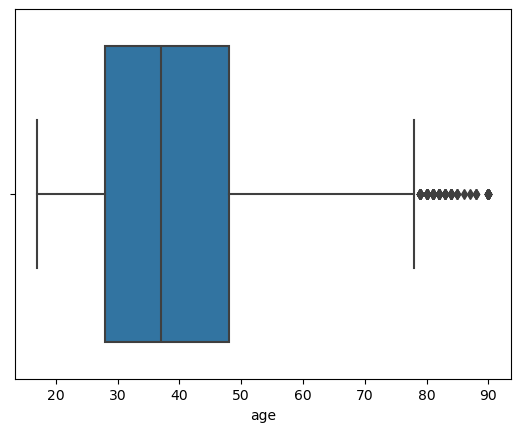

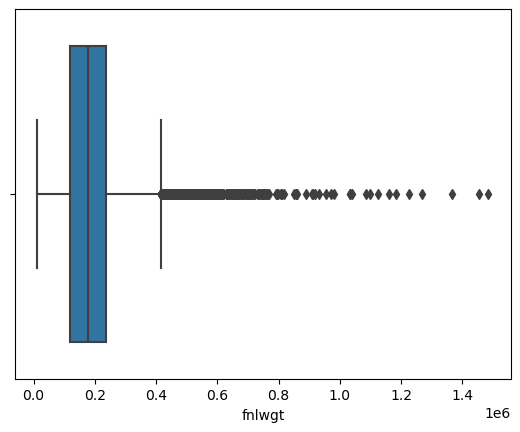

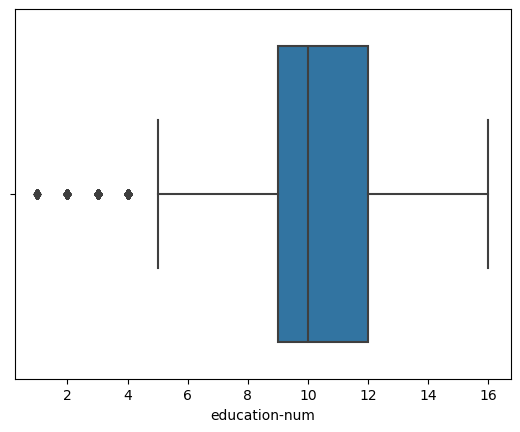

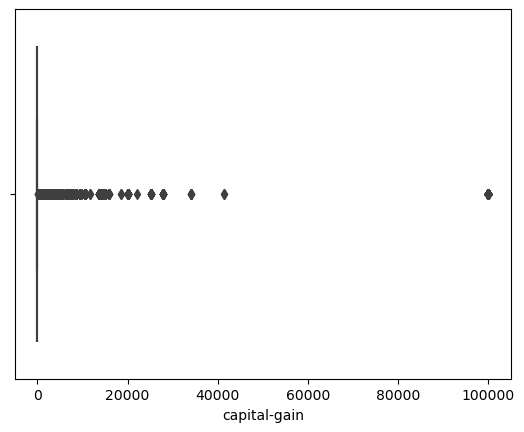

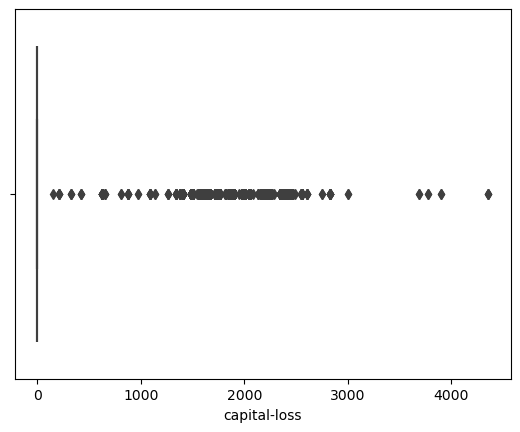

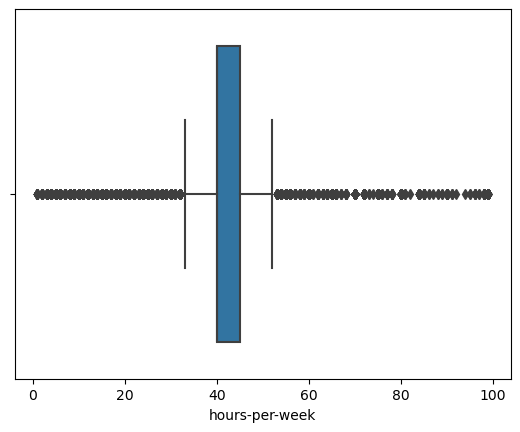

In [10]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each column in the DataFrame
for column in num_cols:
    sns.boxplot(x=df[column])
    plt.show()


In [11]:
# sum of outliers

count = 0
for col in numerical_columns:
  # Calculate the interquartile range (IQR)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find the outliers
  outliers = df[~((df[col] >= lower_bound) & (df[col] <= upper_bound))]

  # Count the outliers
  count += len(outliers)

print(f"Total number of outliers: {count}")


Total number of outliers: 15571


In [12]:
# filtering outliers

# Remove outliers
for col in numerical_columns:
  # Calculate the interquartile range (IQR)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find the outliers
  outliers = df[~((df[col] >= lower_bound) & (df[col] <= upper_bound))]

  # Remove the outliers
  df = df.drop(outliers.index)

# Print the new shape of the DataFrame
print(df.shape)


(19004, 14)


In [13]:
#Number and proportion of outliers filtered

# Number of outliers removed
outliers_removed = count

# Proportion of outliers removed
proportion_outliers_removed = outliers_removed / df.shape[0]

print(f"Number of outliers removed: {outliers_removed}")
print(f"Proportion of outliers removed: {proportion_outliers_removed:.2%}")


Number of outliers removed: 15571
Proportion of outliers removed: 81.94%


In [14]:
#Check shape before drop
df.shape

(19004, 14)

In [15]:
df=df.drop_duplicates()

removing missing values

In [16]:
df.duplicated().sum()


0

In [17]:
#count number of duplicates and propotion of duplicates

duplicate_count = df.duplicated().sum()
total_rows = len(df)
duplicate_proportion = duplicate_count / total_rows
print(f"Number of duplicate rows: {duplicate_count}")
print(f"Proportion of duplicate rows: {duplicate_proportion:.2%}")


Number of duplicate rows: 0
Proportion of duplicate rows: 0.00%


In [18]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

checking for Datatypes

In [19]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [20]:
#REMOVING WARNINGS
import warnings
warnings.filterwarnings('ignore')

Handiling The Datatype

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['marital-status']=le.fit_transform(df['marital-status'])
df['occupation']=le.fit_transform(df['occupation'])
df['relationship']=le.fit_transform(df['relationship'])
df['sex']=le.fit_transform(df['sex'])
df['native-country']=le.fit_transform(df['native-country'])
df['salary']=le.fit_transform(df['salary'])

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1,38,4,215646,8,9,0,6,1,1,0,0,40,38,0
2,53,4,234721,1,7,2,6,0,1,0,0,40,38,0
3,28,4,338409,6,13,2,10,5,0,0,0,40,5,0
4,37,4,284582,9,14,2,4,5,0,0,0,40,38,0
6,52,6,209642,8,9,2,4,0,1,0,0,45,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,53,4,321865,9,14,2,4,0,1,0,0,40,38,1
32554,22,4,310152,11,10,4,11,1,1,0,0,40,38,0
32555,27,4,257302,4,12,2,13,5,0,0,0,38,38,0
32556,40,4,154374,8,9,2,7,0,1,0,0,40,38,1


In [22]:
#  dimensionality reduction based on pca

from sklearn.decomposition import PCA

# Standardize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(scaled_data)

# Print the shape of the reduced data
print(reduced_data.shape)


(18991, 11)


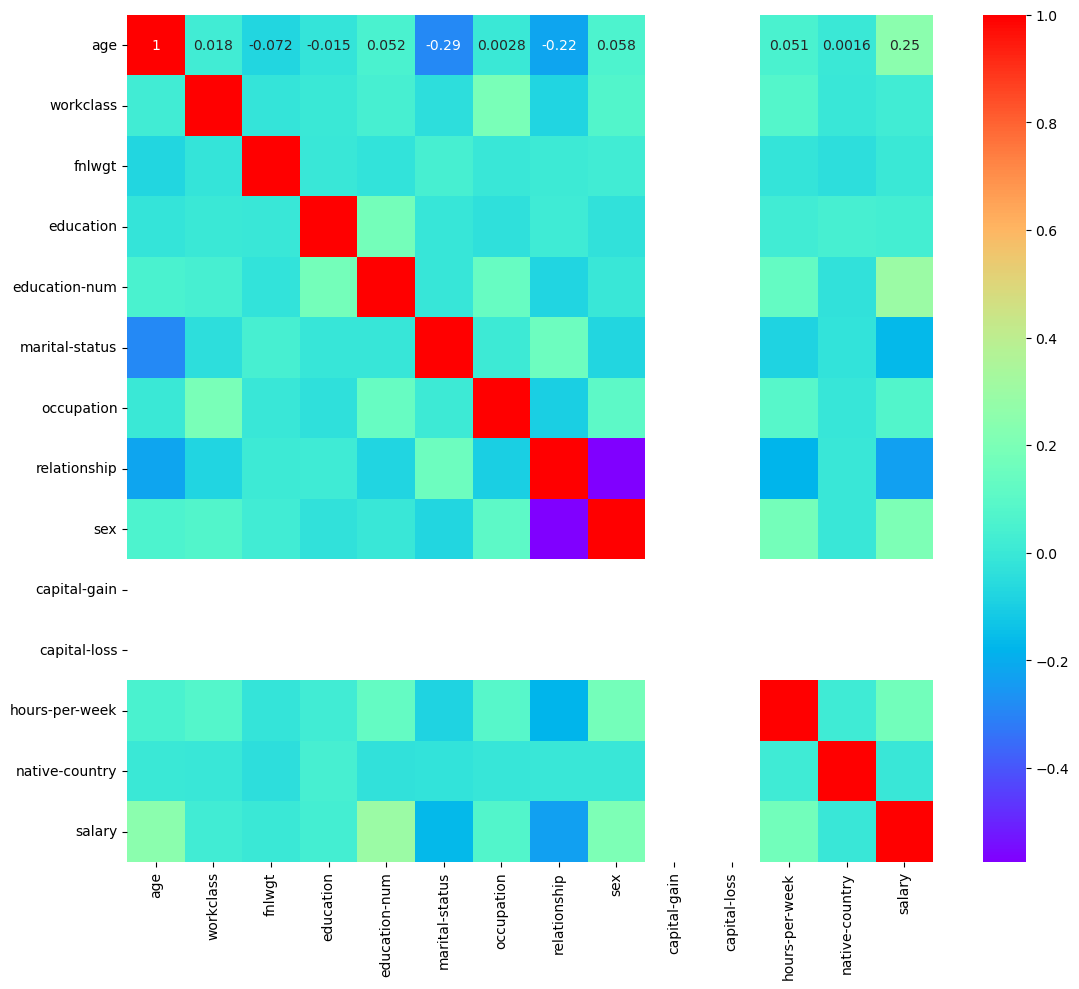

In [23]:
#Finding the correlation using heat map
corr=df.corr()
plt.figure(figsize=(13,11))
#annot=True: This parameter is used to annotate each cell of the heatmap
#with the numeric value.
sns.heatmap(corr,annot=True,cmap='rainbow')
print()
print()
plt.show()

In [24]:
df.to_csv('Adult_Python_Preprocess.csv', index=False) 

# seperate input and output as X and Y

In [25]:
X=df.drop(['salary'],axis=1)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
1,38,4,215646,8,9,0,6,1,1,0,0,40,38
2,53,4,234721,1,7,2,6,0,1,0,0,40,38
3,28,4,338409,6,13,2,10,5,0,0,0,40,5
4,37,4,284582,9,14,2,4,5,0,0,0,40,38
6,52,6,209642,8,9,2,4,0,1,0,0,45,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,53,4,321865,9,14,2,4,0,1,0,0,40,38
32554,22,4,310152,11,10,4,11,1,1,0,0,40,38
32555,27,4,257302,4,12,2,13,5,0,0,0,38,38
32556,40,4,154374,8,9,2,7,0,1,0,0,40,38


In [26]:
y=df['salary']
y

1        0
2        0
3        0
4        0
6        1
        ..
32553    1
32554    0
32555    0
32556    1
32557    0
Name: salary, Length: 18991, dtype: int64

In [27]:
#Initialize the MinMaxScaler object
scaler=MinMaxScaler()
#Fit and transform fetures value
X_scaled=scaler.fit_transform(X)
X_scaled


array([[0.3442623 , 0.5       , 0.49999875, ..., 0.        , 0.36842105,
        0.95      ],
       [0.59016393, 0.5       , 0.54750372, ..., 0.        , 0.36842105,
        0.95      ],
       [0.18032787, 0.5       , 0.80573148, ..., 0.        , 0.36842105,
        0.125     ],
       ...,
       [0.16393443, 0.5       , 0.60374013, ..., 0.        , 0.26315789,
        0.95      ],
       [0.37704918, 0.5       , 0.3474051 , ..., 0.        , 0.36842105,
        0.95      ],
       [0.67213115, 0.5       , 0.34126868, ..., 0.        , 0.36842105,
        0.95      ]])

# Splitting Data for train and test

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [29]:
#check the shape of X_os_train,X_os_test,y_os_train and y_os_test
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (13293, 13)
X_test: (5698, 13)
y_train: (13293,)
y_test: (5698,)


In [30]:
# models object
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier(n_estimators=100,random_state=42)
r_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred=r_forest.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

predicting

In [32]:
precision = precision_score(y_test, y_pred, average='weighted')
recall= recall_score(y_test, y_pred, average='weighted')
f1= f1_score(y_test, y_pred, average='weighted')
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-Score:", round(f1, 3))
print(classification_report(y_test,y_pred))
y_pred=r_forest.predict(scaler.transform([[38,4,215646,8,9,0,6,1,1,0,0,40,38]]))
if y_pred==0:
    print('less than 50K')
elif y_pred==1:
    print('more than 50k')

Precision: 0.815
Recall: 0.826
F1-Score: 0.818
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4463
           1       0.62      0.49      0.55      1235

    accuracy                           0.83      5698
   macro avg       0.75      0.70      0.72      5698
weighted avg       0.81      0.83      0.82      5698

less than 50K


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
g_boost=GradientBoostingClassifier(n_estimators=100,random_state=42)
g_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [36]:
y_pred_i=g_boost.predict(X_test)
y_pred_i

array([0, 0, 1, ..., 1, 1, 0])

In [37]:
precision = precision_score(y_test, y_pred_i, average='weighted')
recall= recall_score(y_test, y_pred_i, average='weighted')
f1= f1_score(y_test, y_pred_i, average='weighted')
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-Score:", round(f1, 3))
print(classification_report(y_test,y_pred_i))
y_pred_i=g_boost.predict(scaler.transform([[38,4,215646,8,9,0,6,1,1,0,0,40,38]]))
if y_pred_i==0:
    print('less than 50 k')
elif y_pred_i==1:
    print('more than 50 k')


Precision: 0.835
Recall: 0.845
F1-Score: 0.835
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4463
           1       0.70      0.50      0.58      1235

    accuracy                           0.85      5698
   macro avg       0.79      0.72      0.74      5698
weighted avg       0.83      0.85      0.84      5698

less than 50 k
